# **Given information about placement data of a batch of students in college campus, predict whether the student will be placed or not.**

Import Libraries 

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model
%matplotlib inline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
from sklearn.metrics import precision_score,recall_score, f1_score

Read the file and Observe 

In [61]:
df = pd.read_csv(r"C:\Users\arinath\Documents\Personal\IK\ML\Supervised Learning\placementData.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Let's try to explore these features - Both categorical and numerical. 
Check For - 
1. Data types of each features 
2. Missing Values
3. Unique Values
4. Encode categorical features  

In [62]:
df.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [63]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


Drop columns that are of no use. In our case, we have no use of sl_no 

In [64]:
df = df.drop(['sl_no'], axis=1)

Can we obtain some insights on the dataset using -
1. Categorical Plots such as (not limited to)

  *   Gender comparison - *(Discussed below)*
  *   Influence of any specialization/school courses in Job
  *   Placement statistics with respect to various features

2. Correlation Matrix/ Heat maps between features 

C:\Users\arinath\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='status', ylabel='count'>

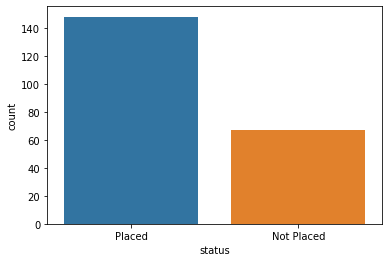

In [49]:
sns.countplot('status', data=df)

In [50]:
distribution_df = pd.DataFrame(df.groupby(['gender','status'])['status'].count())
print(distribution_df)

                   status
gender status            
F      Not Placed      28
       Placed          48
M      Not Placed      39
       Placed         100


<AxesSubplot:xlabel='gender', ylabel='count'>

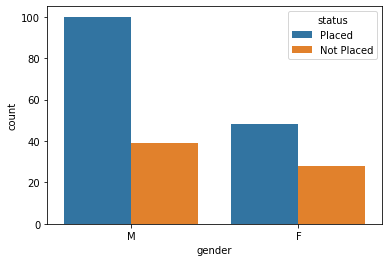

In [65]:
sns.countplot(x='gender', hue='status', data=df)
# Plotting placement stats by gender 

Text(10.049999999999997, 0.5, 'Degree')

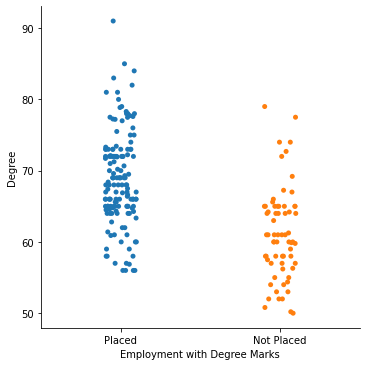

In [66]:
# Plotting Placement stats by degree percentage 
sns.catplot(y='degree_p', x='status', data=df)
plt.xlabel('Employment with Degree Marks')
plt.ylabel('Degree')

Can you find some more interesting insights through this dataset ? 

In [67]:
df.groupby('specialisation').max().reset_index()

,specialisation,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,mba_p,status,salary
0,Mkt&Fin,M,87.0,Others,97.7,Others,Science,85.0,Sci&Tech,Yes,98.0,77.89,Placed,940000.0
1,Mkt&HR,M,89.4,Others,91.0,Others,Science,91.0,Sci&Tech,Yes,97.0,76.26,Placed,450000.0


In [68]:
df.groupby('degree_t')['salary'].max().reset_index()

,degree_t,salary
0,Comm&Mgmt,940000.0
1,Others,360000.0
2,Sci&Tech,690000.0


Text(14.395069444444445, 0.5, 'MBA Score')

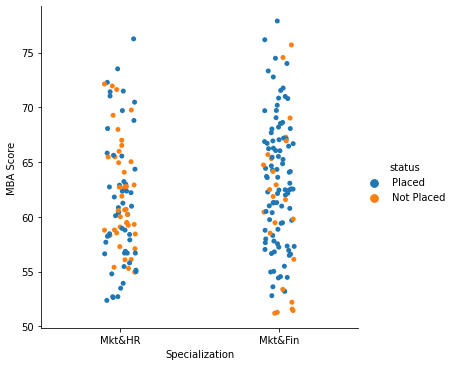

In [69]:
sns.catplot(x='specialisation',y='mba_p', hue='status', data=df)
plt.xlabel('Specialization')
plt.ylabel('MBA Score')

In [71]:
df1 = df[df.sort_values('salary',ascending = False).groupby('degree_p').head(5)]()
df1

ValueError: Boolean array expected for the condition, not object

#### Correlation matrix followed by the heatmap

In [ ]:
df.corr()

<AxesSubplot:>

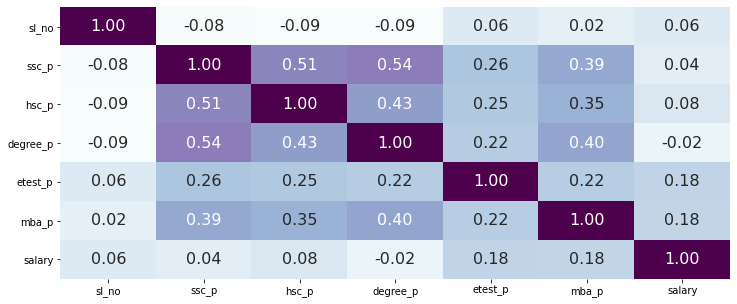

In [6]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),
           cmap='BuPu',
           annot=True,
           fmt=".2f",
           annot_kws={'size':16},
           cbar=False)

#### **REMINDER**

Do we need any more preprocessing step ? Check if you have -

1.   Encoded all the categorical features 
2.   Collinearity Test 
3.   Normalisation/Standardization of features 
4.   Handled all missing values, noisy inputs.





#### Find the count of NA in each column of the dataset

In [72]:
df.isna().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

#### Impute NaNs in salary with 0

In [73]:
df['salary'] = df['salary'].fillna(0)
df.isna().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

#### Label Encode all non-numeric features

In [74]:
print(df['gender'].unique())
print(df['ssc_b'].unique())
print(df['hsc_b'].unique())
print(df['hsc_s'].unique())
print(df['degree_t'].unique())
print(df['workex'].unique())
print(df['specialisation'].unique())
print(df['status'].unique())

['M' 'F']
['Others' 'Central']
['Others' 'Central']
['Commerce' 'Science' 'Arts']
['Sci&Tech' 'Comm&Mgmt' 'Others']
['No' 'Yes']
['Mkt&HR' 'Mkt&Fin']
['Placed' 'Not Placed']


In [75]:
df['gender'] = df.gender.astype("category").cat.codes
df['ssc_b'] = df.ssc_b.astype("category").cat.codes
df['hsc_b'] = df.hsc_b.astype("category").cat.codes
df['hsc_s'] = df.hsc_s.astype("category").cat.codes
df['degree_t'] = df.degree_t.astype("category").cat.codes
df['workex'] = df.workex.astype("category").cat.codes
df['specialisation'] = df.specialisation.astype("category").cat.codes
df['status'] = df.status.astype("category").cat.codes
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


#### Test for Collinearity

OK, let's split our dataset into train-dev-test  

### Splitting into Train and Test followed by Normalization

In [76]:
# Define target and features
target = df['status']
features = df.drop(['status'], axis=1)

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=42)
# fit scaler on entire dataset ... 

#### Perform feature scaling
norm = MinMaxScaler().fit(X_train)
# transform training data
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)

Import your classification model of choice, fit the model on training set 

C:\Users\arinath\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


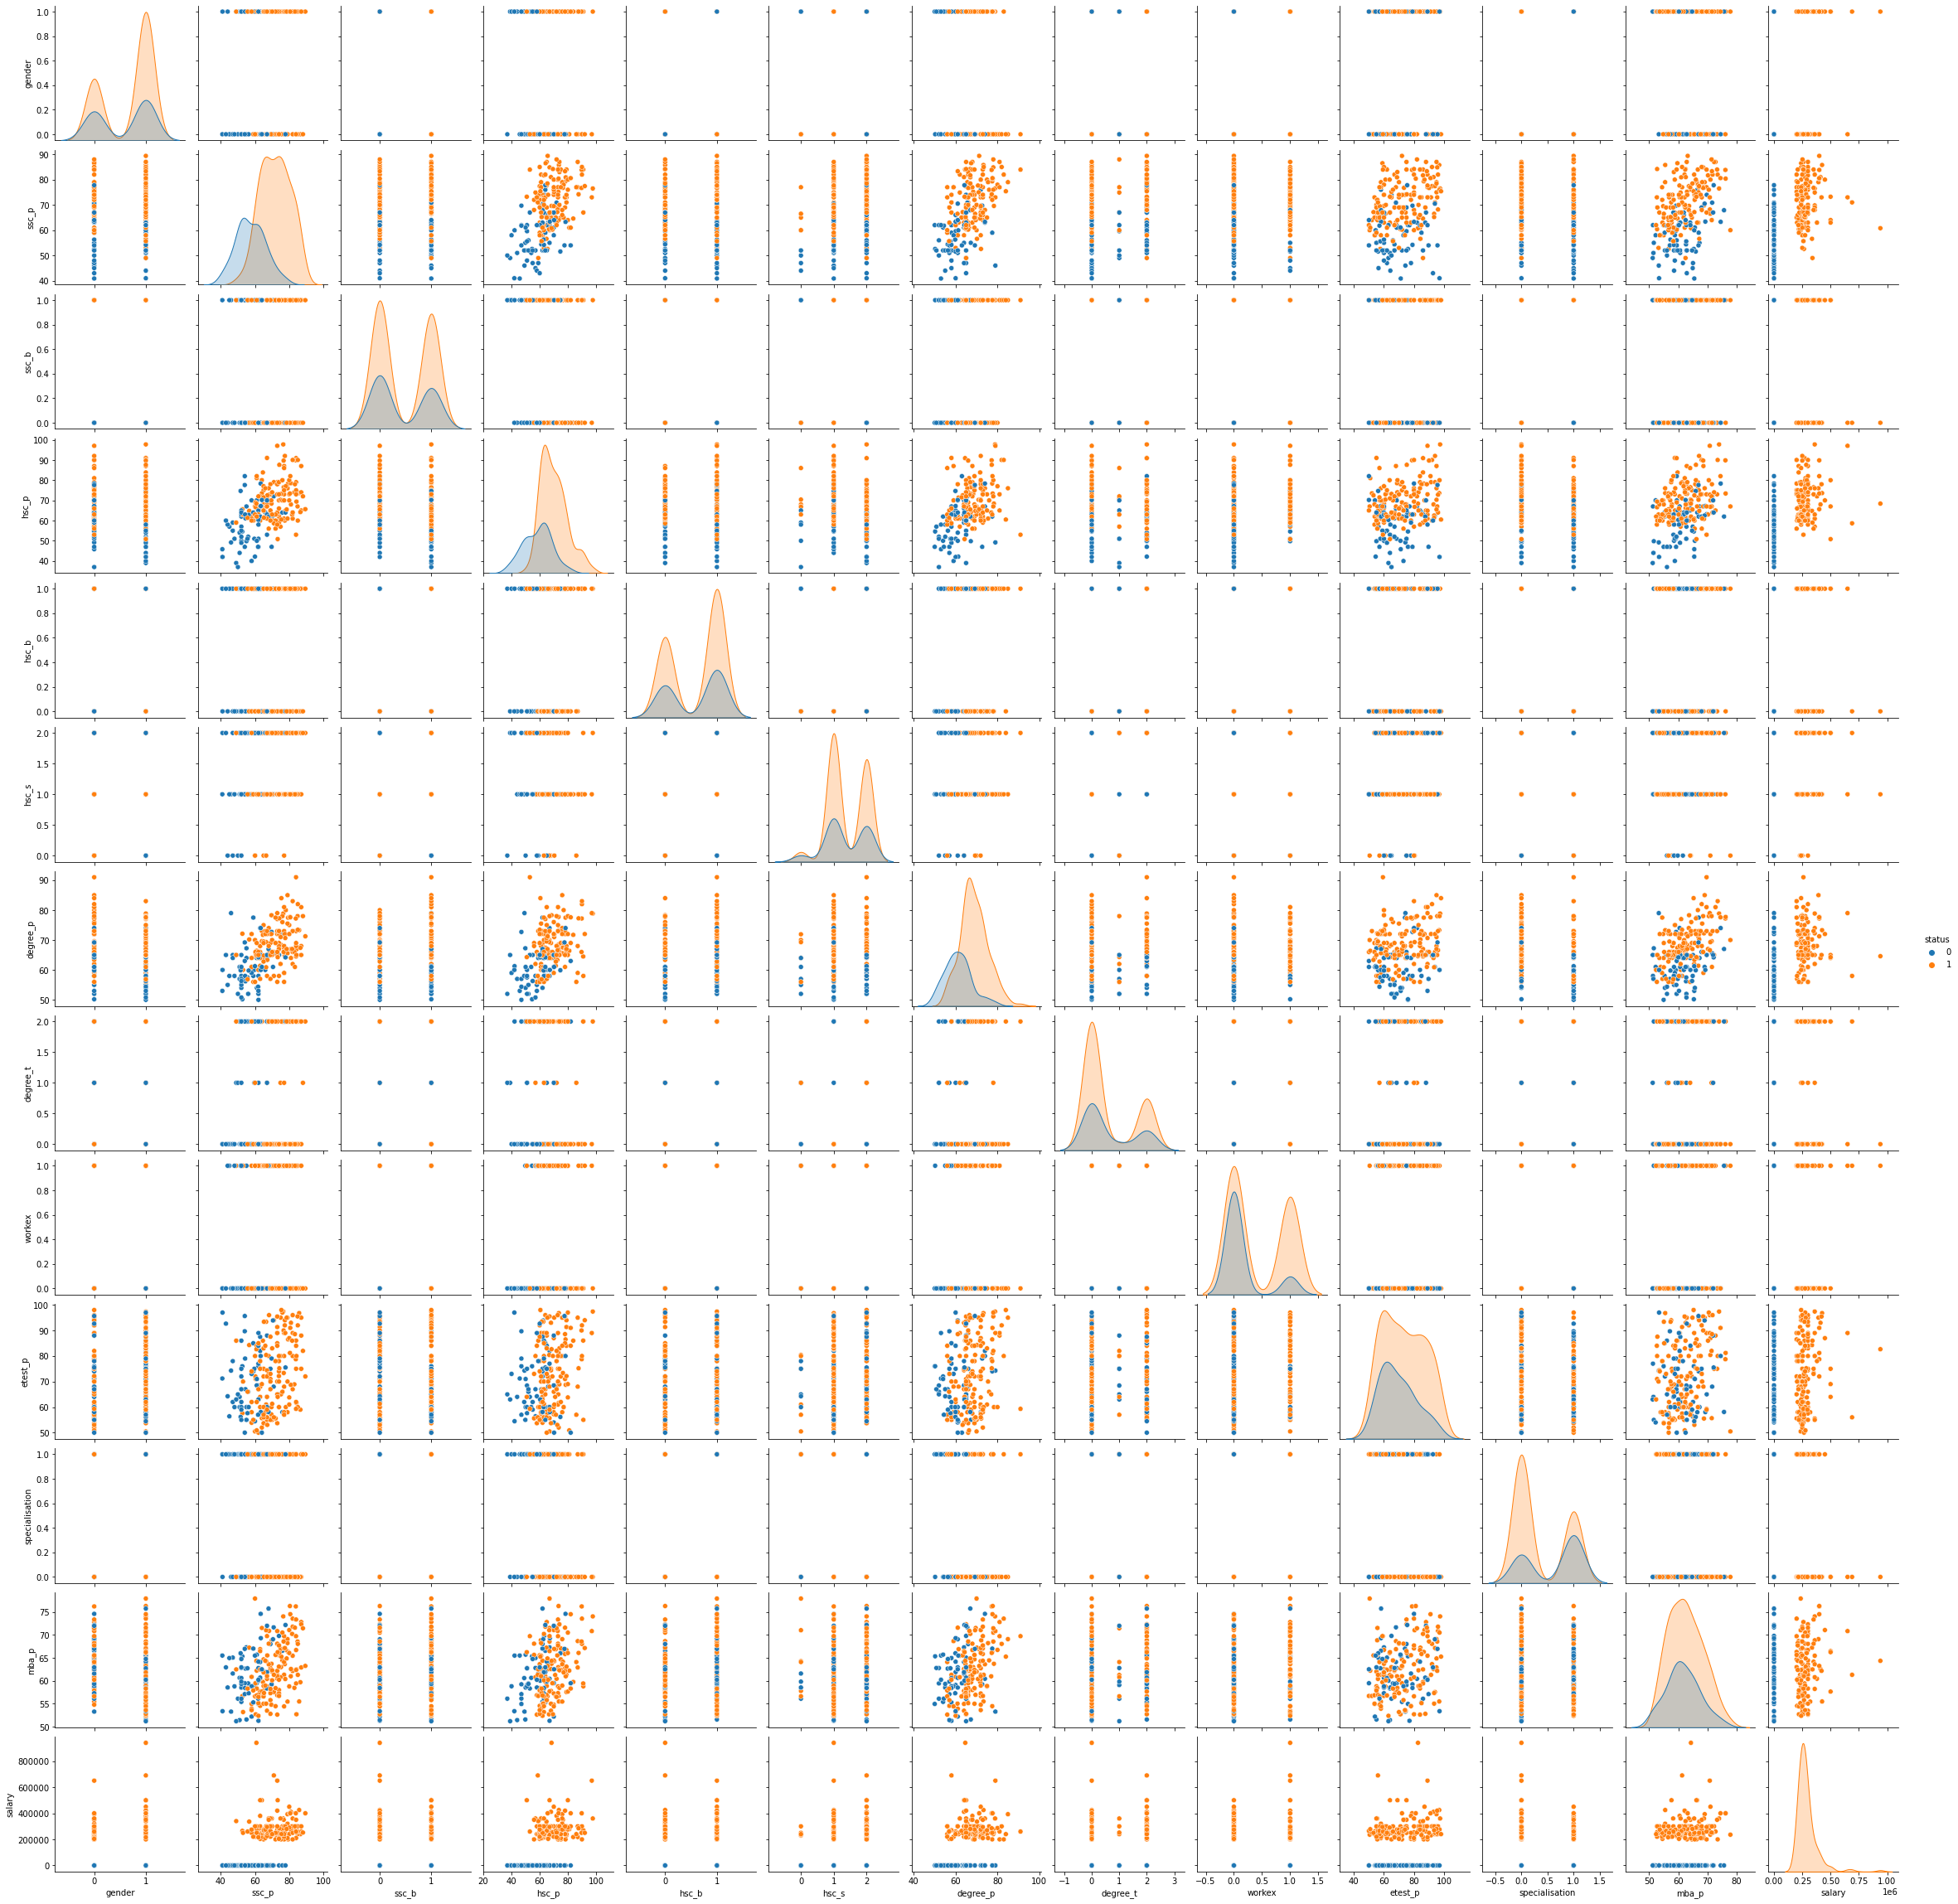

In [77]:
sns.pairplot(df, hue = 'status')

#### Classifier: Logistic Regression

In [78]:
clf_lr = LogisticRegression(random_state=0).fit(X_train_norm, y_train)
print(clf_lr.coef_, clf_lr.intercept_) #Getting the coefficient and intercept to detect multicollinearity

[[-0.01845929  2.56521306 -0.0251726   1.5218551  -0.10014101  0.02816984
   1.62042119 -0.29461452  0.77967494  0.1935778  -0.55689041 -0.84724601
   3.99302739]] [-2.03823056]


In [79]:
# Predict using test set
clf_lr_pred = clf_lr.predict(X_test_norm)
clf_lr_prob_pred = clf_lr.predict_proba(X_test_norm)[:,1]

Let's try to measure performance using - 
1. Confusion Matrix 
2. Accuracy 
3. Precision
4. Recall
5. ROC Curve 
6. AUC to Compare the performance of classification algorithms used
7. Precision Recall Curve  

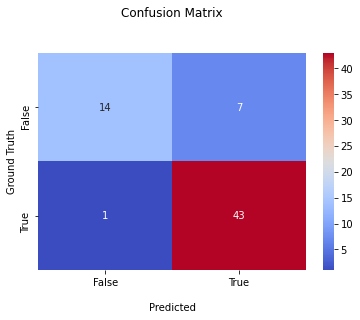

In [80]:
#Confusion Matrix
cf_lr_matrix = confusion_matrix(y_test, clf_lr_pred)

ax = sns.heatmap(cf_lr_matrix, annot=True, cmap='coolwarm')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted')
ax.set_ylabel('Ground Truth');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [81]:
cf_lr_acc = balanced_accuracy_score(y_test, clf_lr_pred)
cf_lr_prec = precision_score(y_test, clf_lr_pred)
cf_lr_rec = recall_score(y_test, clf_lr_pred)

print('Accuracy: ',round(cf_lr_acc,3))
print('Precision: ',round(cf_lr_prec,3))
print('Recall: ',round(cf_lr_rec,3))

Accuracy:  0.822
Precision:  0.86
Recall:  0.977


ROC AUC:  0.9891774891774892


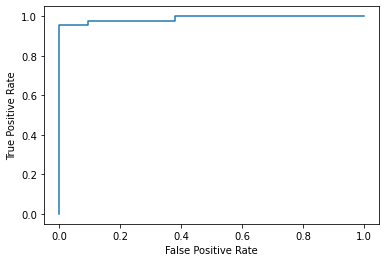

In [87]:
#Generate the ROC curve
fpr, tpr, _ = roc_curve(y_test, clf_lr_prob_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
print('ROC AUC: ',roc_auc_score(y_test, clf_lr_prob_pred))

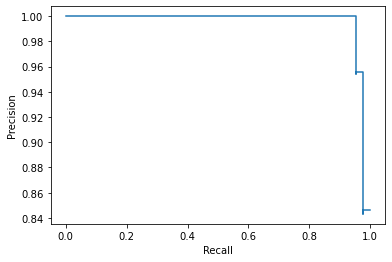

In [83]:
#Generate the PR curve
lr_prec, lr_recall, _ = precision_recall_curve(y_test, clf_lr_prob_pred)
lr_pr_display = PrecisionRecallDisplay(precision=lr_prec, recall=lr_recall).plot()

How can we check if our model is overfitting on the dataset ? What about outliers, are they affecting our model's performance ? 


##### Cross Validation scores

<AxesSubplot:>

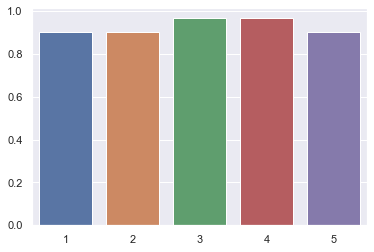

In [102]:
scores = cross_val_score(clf_lr, X_train_norm, y_train, cv=5)
sns.set()
sns.barplot(x=[1,2,3,4,5],y=scores)

#### Classifier: Decision Tree Classifier

In [94]:
clf_dt = DecisionTreeClassifier(random_state=0).fit(X_train_norm, y_train)
# Predict using test set
clf_dt_pred = clf_dt.predict(X_test_norm)
clf_dt_pred_pred = clf_dt.predict_proba(X_test_norm)[:,1]

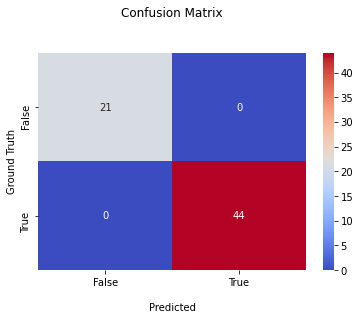

In [96]:
#Confusion Matrix
cf_dt_matrix = confusion_matrix(y_test, clf_dt_pred)

ax = sns.heatmap(cf_dt_matrix, annot=True, cmap='coolwarm')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted')
ax.set_ylabel('Ground Truth');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [97]:
cf_dt_acc = balanced_accuracy_score(y_test, clf_dt_pred)
cf_dt_prec = precision_score(y_test, clf_dt_pred)
cf_dt_rec = recall_score(y_test, clf_dt_pred)

print('Accuracy: ',round(cf_dt_acc,3))
print('Precision: ',round(cf_dt_prec,3))
print('Recall: ',round(cf_dt_rec,3))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0


##### Cross Validation scores

In [103]:
scores = cross_val_score(clf_dt, X_train_norm, y_train, cv=5)
scores

array([1., 1., 1., 1., 1.])

<AxesSubplot:>

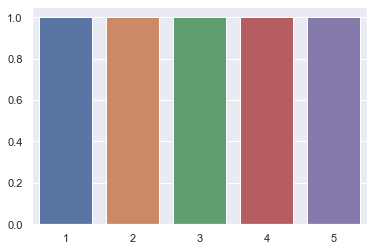

In [104]:
scores = cross_val_score(clf_dt, X_train_norm, y_train, cv=5)
sns.set()
sns.barplot(x=[1,2,3,4,5],y=scores)